# Project 4: Regression Analysis and Define Your Own Task!

##### Group Member
Yifu Yuan, 804973353  
Zhiquan You, 205667859  
Wenxuan Wu, 705846929

### Question 1. Standardize feature columns and prepare them for training.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_selection import mutual_info_regression, f_regression
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor

In [2]:
def cross_validation(model, X, y, n_splits=10):
    kf = KFold(n_splits=n_splits)
    train_rmse, test_rmse = 0, 0
    for train, test in kf.split(X):
        train_data, train_target = X.loc[train], y.loc[train]
        test_data, test_target = X.loc[test], y.loc[test]
        model.fit(train_data, train_target)
        train_pred, test_pred = model.predict(train_data), model.predict(test_data)
        train_rmse += metrics.mean_squared_error(train_target, train_pred) ** 0.5
        test_rmse += metrics.mean_squared_error(test_target, test_pred) ** 0.5
    return train_rmse/n_splits, test_rmse/n_splits

In [3]:
diamond_df = pd.read_csv('diamonds.csv')
gt_2011 = pd.read_csv('gt_2011.csv')
gt_2012 = pd.read_csv('gt_2012.csv')
gt_2013 = pd.read_csv('gt_2013.csv')
gt_2014 = pd.read_csv('gt_2014.csv')
gt_2015 = pd.read_csv('gt_2015.csv')

FileNotFoundError: ignored

In [4]:
all_files = ['gt_2011.csv','gt_2012.csv', 'gt_2013.csv','gt_2014.csv', 'gt_2015.csv']
arr = []
for filename in all_files:
    year = filename.split("_")[1].split('.')[0]
    df = pd.read_csv(filename, index_col=None, header=0)
    row, col = df.shape
    year_col = [year] * row
    df['Year'] = year_col
    arr.append(df)

gt_df = pd.concat(arr, axis=0, ignore_index=True)
gt_df.drop(columns=["NOX"], inplace=True)
gt_df

FileNotFoundError: ignored

In [ ]:
diamond_df = diamond_df.iloc[:, 1:]
diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2758,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2759,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2760,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
cut_to_num = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
color_to_num = {'J':0, 'I':1,'H':2, 'G':3, 'F':4, 'E':4, 'D':5}
clarity_to_num = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2':3, 'VS1': 4, 'VVS2': 5, 'VVS1':6, 'IF':7}

diamond_df['cut'].replace(cut_to_num, inplace=True)
diamond_df['color'].replace(color_to_num, inplace=True)
diamond_df['clarity'].replace(clarity_to_num, inplace=True)

diamond_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,4,1,61.5,55.0,330,3.95,3.98,2.43
1,0.21,3,4,2,59.8,61.0,327,3.89,3.84,2.31
2,0.23,1,4,4,56.9,65.0,328,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,337,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,338,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,5,2,60.8,57.0,2758,5.75,5.76,3.50
53936,0.72,1,5,2,63.1,55.0,2759,5.69,5.75,3.61
53937,0.70,2,5,2,62.8,60.0,2760,5.66,5.68,3.56
53938,0.86,3,2,1,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
diamond_numerical = ['carat', 'depth', 'table', 'x', 'y', 'z']
diamond_categorical = ['cut', 'color', 'clarity']
diamond_std = StandardScaler().fit_transform(diamond_df.values)
diamond_std_df = pd.DataFrame(diamond_std, index=diamond_df.index, columns=diamond_df.columns)
diamond_std_df
#diamond_df[diamond_numerical] = StandardScaler().fit_transform(diamond_df[diamond_numerical])
#diamond_std_df = diamond_df
#diamond_std_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.198168,0.981473,0.658175,-1.245215,-0.174092,-1.099672,-0.903594,-1.587837,-1.536196,-1.571129
1,-1.240361,0.085889,0.658175,-0.638095,-1.360738,1.585529,-0.904346,-1.641325,-1.658774,-1.741175
2,-1.198168,-1.705279,0.658175,0.576145,-3.385019,3.375663,-0.904095,-1.498691,-1.457395,-1.741175
3,-1.071587,0.085889,-1.532267,-0.030975,0.454133,0.242928,-0.901839,-1.364971,-1.317305,-1.287720
4,-1.029394,-1.705279,-2.262415,-1.245215,1.082358,0.242928,-0.901588,-1.240167,-1.212238,-1.117674
...,...,...,...,...,...,...,...,...,...,...
53935,-0.164427,0.981473,1.388322,-0.638095,-0.662711,-0.204605,-0.294982,0.016798,0.022304,-0.054888
53936,-0.164427,-1.705279,1.388322,-0.638095,0.942753,-1.099672,-0.294731,-0.036690,0.013548,0.100988
53937,-0.206621,-0.809695,1.388322,-0.638095,0.733344,1.137995,-0.294480,-0.063434,-0.047741,0.030135
53938,0.130927,0.085889,-0.802120,-1.245215,-0.523105,0.242928,-0.295232,0.373383,0.337506,0.285204


In [ ]:
gt_numerical = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']
gt_categorical = ['Year']
gt_std = StandardScaler().fit_transform(gt_df.values)
gt_std_df = pd.DataFrame(gt_std, index=gt_df.index, columns=gt_df.columns)
gt_std_df
#gt_df[gt_numerical] = StandardScaler().fit_transform(gt_df[gt_numerical])
#gt_std_df = gt_df
#gt_std_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,Year
0,-1.762362,0.871052,0.401627,-0.451875,-0.377702,0.272119,0.536589,0.074502,-0.149273,-0.904182,-1.399443
1,-1.801920,0.809164,0.440351,-0.458207,-0.384376,0.266417,0.568742,0.074502,-0.154783,-0.850611,-1.399443
2,-1.854113,0.824636,0.483432,-0.442831,-0.375081,0.289227,0.589203,0.102033,-0.017015,-0.849020,-1.399443
3,-1.875718,0.809164,0.523263,-0.445415,-0.393909,0.289227,0.586280,0.097551,-0.064774,-0.946415,-1.399443
4,-1.874644,0.731804,0.505837,-0.448904,-0.392479,0.255012,0.561434,0.074502,-0.138251,-0.930328,-1.399443
...,...,...,...,...,...,...,...,...,...,...,...
36728,-1.891401,2.387315,1.060287,-0.981255,-1.543602,-2.533516,-0.667691,-1.563948,-1.515021,3.809943,1.419550
36729,-1.818812,2.402787,1.118097,-0.947401,-1.560524,-2.499301,-0.566847,-1.582516,-1.576558,3.876679,1.419550
36730,-1.642292,2.387315,1.199903,-0.791702,-1.598418,-2.476491,-0.391466,-1.645262,-1.468179,3.996008,1.419550
36731,-1.588354,2.418260,1.129438,0.074403,-0.476847,-0.258214,0.577511,-0.134226,-0.265917,0.415856,1.419550


### Question 2. Plot a heatmap of the Pearson correlation matrix of the dataset columns. Report which features have the highest absolute correlation with the target variable. In the context of each dataset, describe what this high correlation suggests.

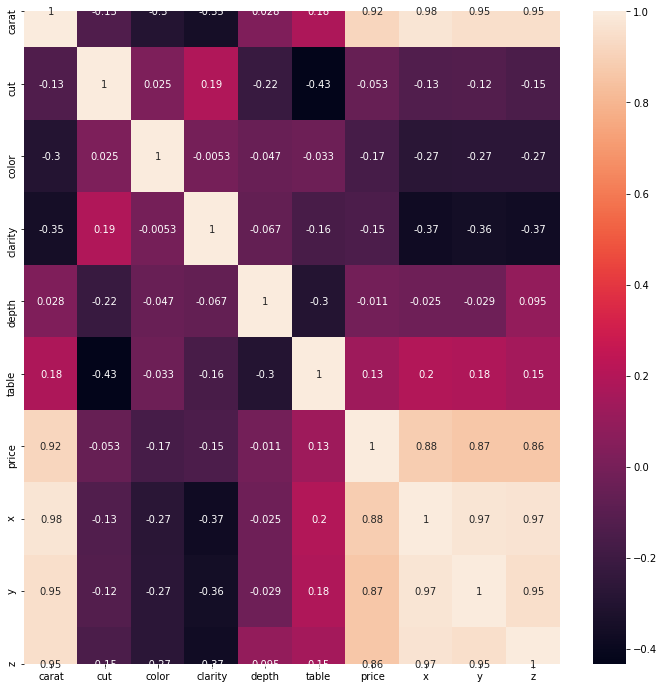

In [ ]:
plt.figure(figsize = (12, 12))
diamond_heatmap = sns.heatmap(diamond_std_df.corr(method = "pearson"), annot = True)
plt.show()

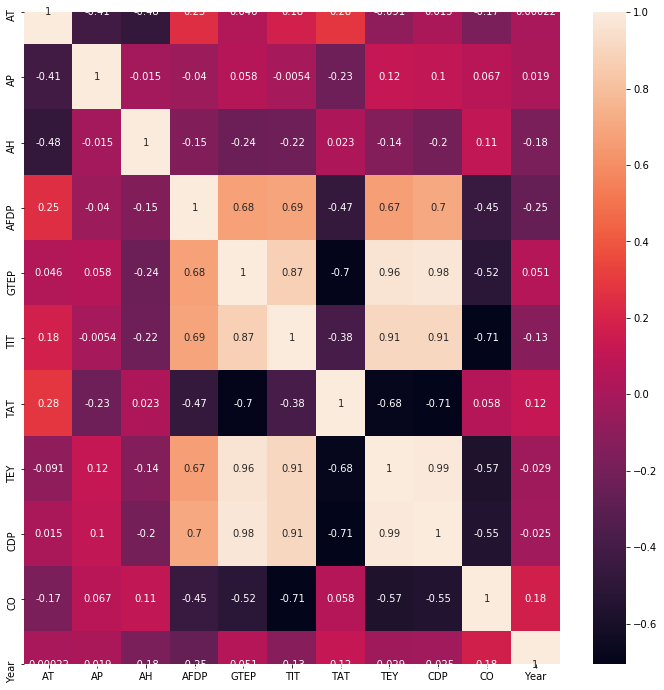

In [ ]:
plt.figure(figsize = (12, 12))
gt_heatmap = sns.heatmap(gt_std_df.corr(method = "pearson"), annot = True)
plt.show()

1. For diamond, the highest absolute correlation is feature carat. This makes sense because generally speaking greater the carat, the more expensive is the diamond.
2. For emission, the highest absolute correlation is TIT. As CO and TIT as of negative correlation, the greater TIT is, the smaller CO emission is.

### Question 3. Plot the histogram of numerical features. What preprocessing can be done if the distribution of a feature has high skewness?

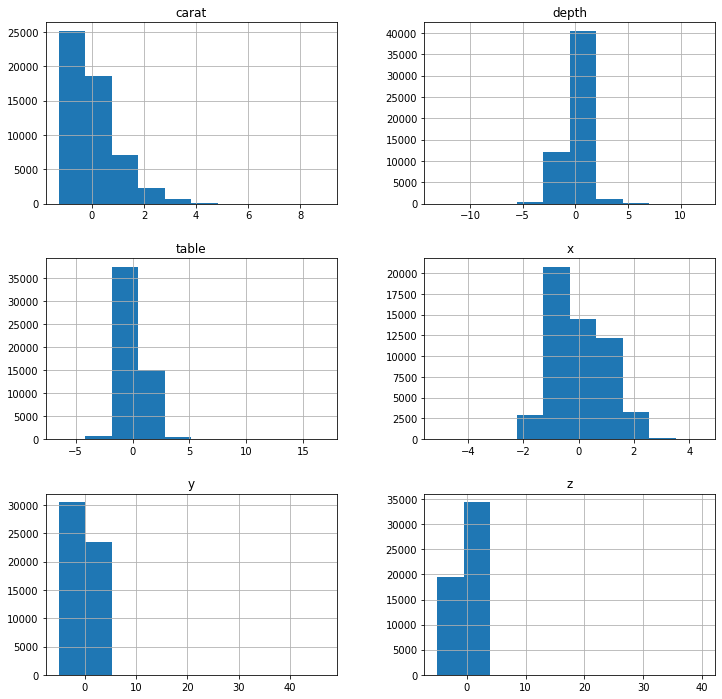

In [ ]:
#diamond_feature = diamond_std_df.columns.values.tolist()
_ = diamond_std_df.hist(column = diamond_numerical, figsize = (12, 12))

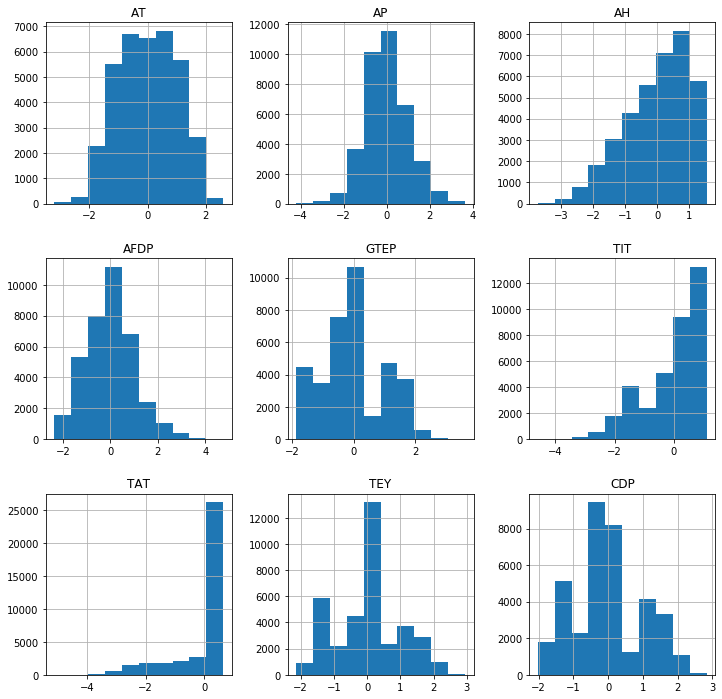

In [ ]:
#gt_feature = gt_std_df.columns.values.tolist()[:-2]
_ = gt_std_df.hist(column = gt_numerical, figsize = (12, 12))

If a feature F is highly skewed, we can try to down sample data points whose F falls in the skewed region. Namely, decrease the number of samples that has a skewed value of feature F.

### Question 4. Construct and inspect the box plot of categorical features vs target variable. What do you find?

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


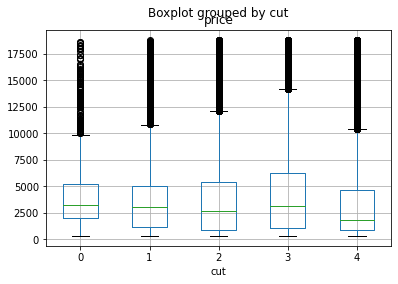

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


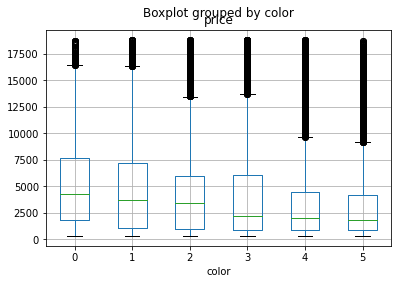

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


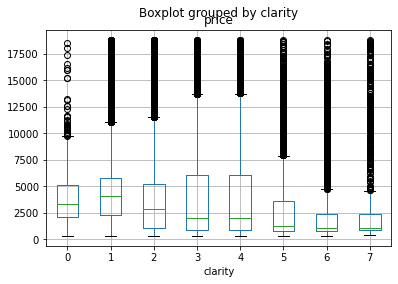

In [ ]:
#dimond_feature = dimond_std_df.columns.values.tolist()
#dimond_feature.pop(0)
#dimond_feature.remove('price')

for feature in diamond_categorical:
    diamond_df.boxplot(column='price', by=feature)
    plt.show()

#diamond_feature

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


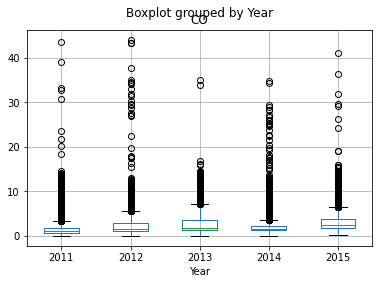

In [ ]:
#gt_feature = gt_std_df.columns.values.tolist()
#gt_feature.remove('NOX')

for feature in gt_categorical:
    gt_df.boxplot(column='CO', by=feature)
    plt.show()



### Question 5. For the Diamonds dataset, plot the counts by color, cut and clarity.

In [ ]:
def plot_bar(x, y, xlabel, ylabel, title):
  plt.bar(x, y)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.title(title)

  plt.show()

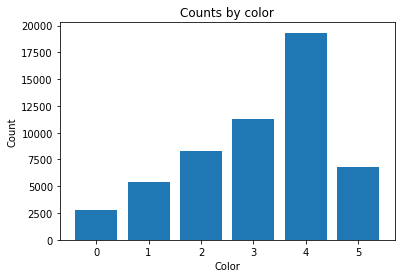

In [ ]:
color = diamond_df['color']
color_count = Counter(color)
plot_bar(color_count.keys(), color_count.values(), 'Color', 'Count', 'Counts by color')

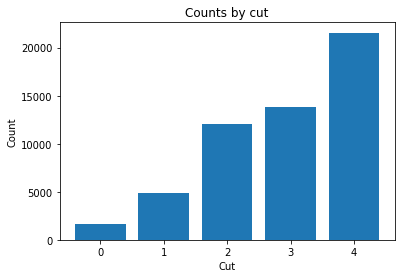

In [ ]:
cut = diamond_df['cut']
cut_count = Counter(cut)
plot_bar(cut_count.keys(), cut_count.values(), 'Cut', 'Count', 'Counts by cut')

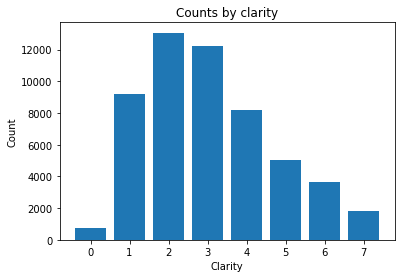

In [ ]:
clarity = diamond_df['clarity']
clarity_count = Counter(clarity)
plot_bar(clarity_count.keys(), clarity_count.values(), 'Clarity', 'Count', 'Counts by clarity')

### Question 6. For the Gas Emission dataset, plot the yearly trends for each feature and compare them. The data points don’t have timestamps but you may assume the indeces are times.

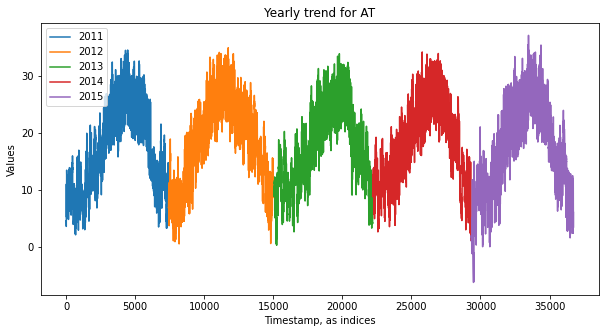

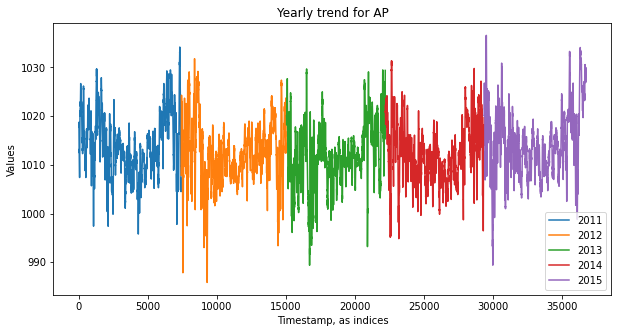

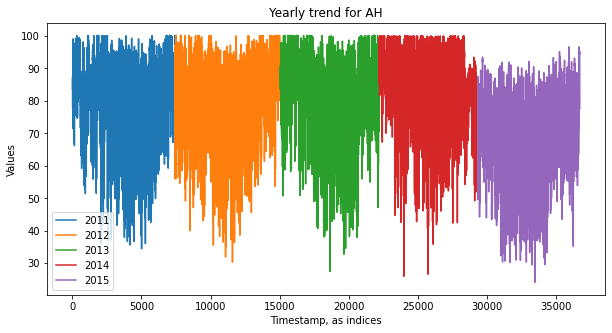

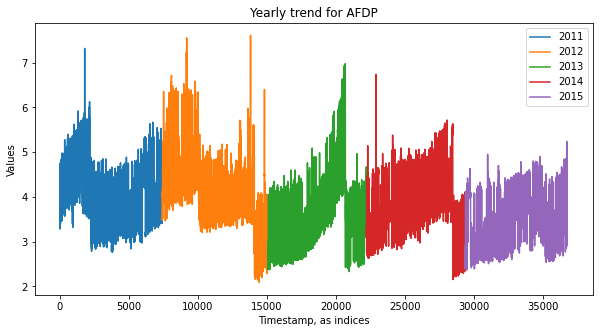

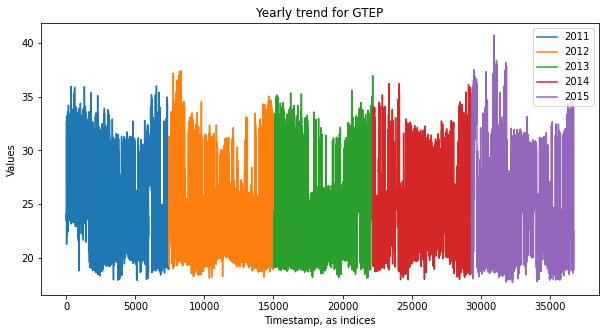

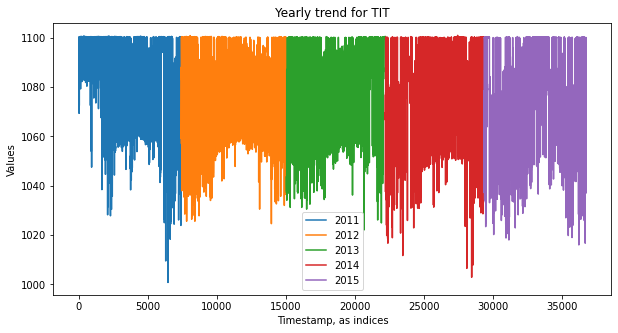

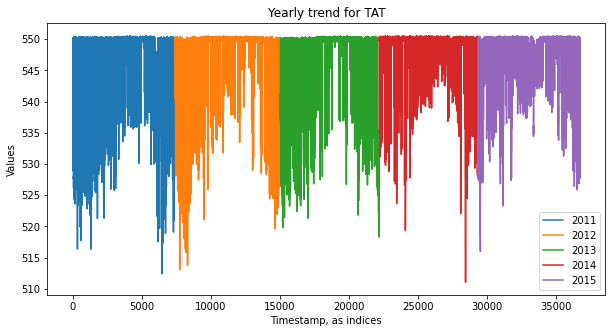

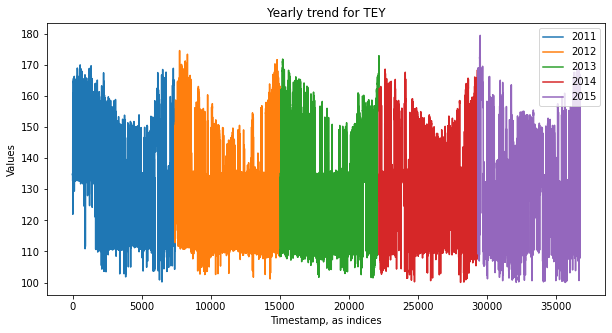

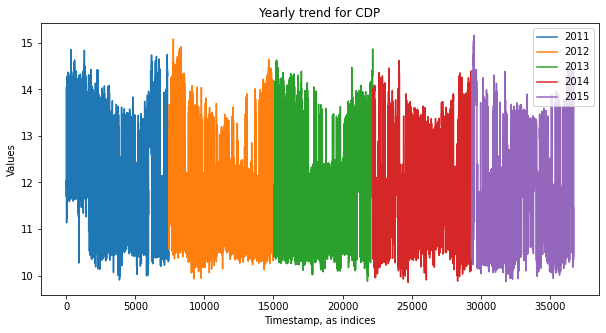

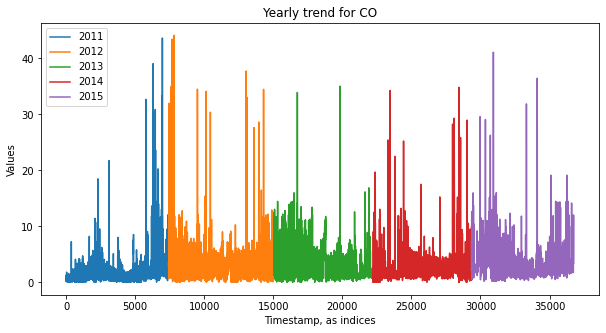

In [ ]:
gt_feature = gt_df.columns.values.tolist()
gt_feature.remove('Year')

for feature in gt_feature:
  fig, ax = plt.subplots(1,1, figsize=(10, 5))
  gt = gt_df.groupby(by=['Year'])[feature].plot(ax=ax,legend=True)
  ax.set_xlabel("Timestamp, as indices")
  ax.set_ylabel("Values")
  ax.set_title('Yearly trend for ' + feature)
  # for key, val in gt:
  #   plt.xlabel('TimeStamp (as indices)')
  #   plt.ylabel('Value')
  #   plt.title('Yearly trend for ' + feature)
  #   plt.plot(val.index, val, label=key)
  #   plt.legend()
  #   plt.show()

### Question 7: Select most important features

In [ ]:
diamond_mi = mutual_info_regression(diamond_std_df.loc[:, diamond_std_df.columns!='price'], diamond_std_df['price'])
print(diamond_mi)

[1.65169359 0.05748899 0.11627508 0.2179626  0.03099212 0.0362559
 1.41244916 1.42296169 1.36097982]


In [ ]:
gt_mi = mutual_info_regression(gt_std_df.loc[:, gt_std_df.columns!='CO'], gt_std_df['CO'])
print(gt_mi)

[0.10487619 0.04216339 0.02552766 0.27863531 0.44541326 0.53672019
 0.16210226 0.49550705 0.47417368 0.12439899]


1. From the printed mutial info above, for diamond we will select carat, cut, color, clarity, x, y and z, for gas emission we will select AT, AFDP, GTEP, TIT, TAT, TEY and CDP, Year as the most important features. 
2. Feature selection generally speaking avoids overfitting by eliminating redundant data and improves accuracy as a result of less misleading data. Therefore, RMSE will be decreased after correct feature selection.

### Question 8: Explain how each regularization scheme affects the learned hypotheses

L1 regularization will force some less important weights to 0 and thus achieve the goal of feature elimination. L2 regularization on the other hand does not easily give up any feature but instead drive weights closer to 0 on each dimension. If one wants to "cut out" some features in learnt coefficients, one might use L1 regularization as it zeroes out some features. If one wants to have simple/smaller model/coefficients, then he can use L2 regularization as this regularization tend to make coefficients shrink in the direction of their respective axis.

### Question 9: Report your choice of the best regularization scheme along with the optimal penalty sorted(sklearn.metrics.SCORERS.keys())parameter and briefly explain how it can be computed.

In [ ]:
def test_reg_scheme(model, alpha_list, feature, target):
  best_rmse, best_alpha = float('inf'), 0
  train_rmse_list = []
  test_rmse_list = []
  for a in alpha_list:
    if model == 'Lasso':
      lasso = Lasso(alpha=a)
      train_rmse, test_rmse = cross_validation(lasso, feature, target)
      train_rmse_list.append(train_rmse)
      test_rmse_list.append(test_rmse)

    elif model == 'Ridge':
      ridge = Ridge(alpha=a)
      train_rmse, test_rmse = cross_validation(ridge, feature, target)
      train_rmse_list.append(train_rmse)
      test_rmse_list.append(test_rmse)

    if test_rmse < best_rmse:
        best_rmse = test_rmse
        best_alpha = a
  print("For", model, "Regression, the smallest rmse is {:.4f} obtained by alpha {}".format(best_rmse, best_alpha))
  return train_rmse_list, test_rmse_list

For dimond dataset

In [ ]:
linear_regression = LinearRegression(n_jobs=-1)
print("RMSE on dimond dataset with feature selection & with standardization")
print(cross_validation(linear_regression, diamond_std_df[['carat','cut', 'color',	'clarity','x', 'y', 'z']], diamond_std_df['price']))
print("RMSE on dimond dataset without feature selection & with standardization")
print(cross_validation(linear_regression, diamond_std_df.drop(columns=['price'], inplace=False), diamond_std_df['price']))
print("RMSE on dimond dataset with feature selection & without standardization")
print(cross_validation(linear_regression, diamond_df[['carat','cut', 'color',	'clarity','x', 'y', 'z']], diamond_df['price']))
print("RMSE on dimond dataset without feature selection & without standardization")
print(cross_validation(linear_regression, diamond_df.drop(columns=['price'], inplace=False), diamond_df['price']))

RMSE on dimond dataset with feature selection & with standardization
(0.30099179935896436, 0.30263214153993284)
RMSE on dimond dataset without feature selection & with standardization
(0.3001816974990362, 0.3005340792391373)
RMSE on dimond dataset with feature selection & without standardization
(1200.7782919201238, 1207.3222817777296)
RMSE on dimond dataset without feature selection & without standardization
(1197.5464672334797, 1198.9522608294637)


In [ ]:
alpha_list = [10**i for i in range(-5, 6)]

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Lasso', alpha_list=alpha_list, feature=diamond_std_df[['carat','cut', 'color',	'clarity','x', 'y', 'z']], target=diamond_std_df['price'])

For Lasso Regression, the smallest rmse is 0.3026 obtained by alpha 1e-05


Text(0.5, 1.0, 'Lasso RMSE on dimond dataset with feature selection & with standardization')

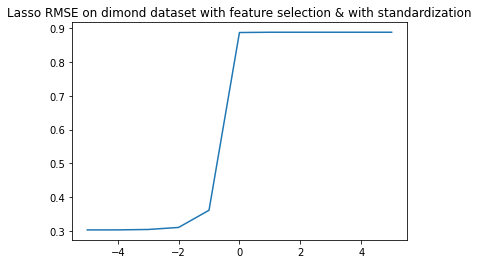

In [ ]:
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Lasso RMSE on dimond dataset with feature selection & with standardization")

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Lasso', alpha_list=alpha_list, feature=diamond_df[['carat','cut', 'color',	'clarity','x', 'y', 'z']], target=diamond_df['price'])

For Lasso Regression, the smallest rmse is 1207.3223 obtained by alpha 1e-05


Text(0.5, 1.0, 'Lasso RMSE on dimond dataset with feature selection & without standardization')

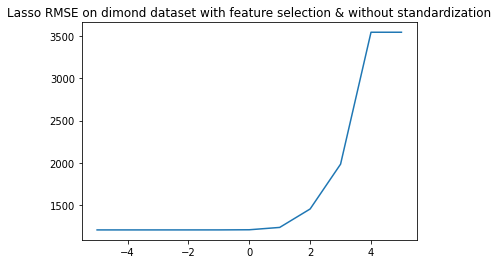

In [ ]:
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Lasso RMSE on dimond dataset with feature selection & without standardization")

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Lasso', alpha_list=alpha_list, feature=diamond_std_df.drop(columns=['price'], inplace=False), target=diamond_std_df['price'])

For Lasso Regression, the smallest rmse is 0.3005 obtained by alpha 1e-05


Text(0.5, 1.0, 'Lasso RMSE on dimond dataset without feature selection & with standardization')

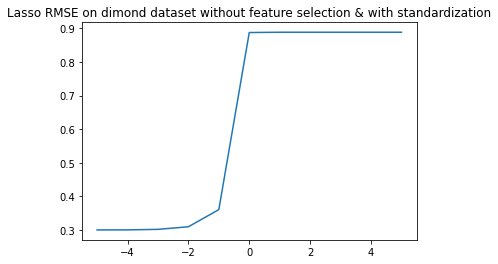

In [ ]:
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Lasso RMSE on dimond dataset without feature selection & with standardization")

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Lasso', alpha_list=alpha_list, feature=diamond_df.drop(columns=['price'], inplace=False), target=diamond_df['price'])

For Lasso Regression, the smallest rmse is 1198.9523 obtained by alpha 1e-05


Text(0.5, 1.0, 'Lasso RMSE on dimond dataset without feature selection & without standardization')

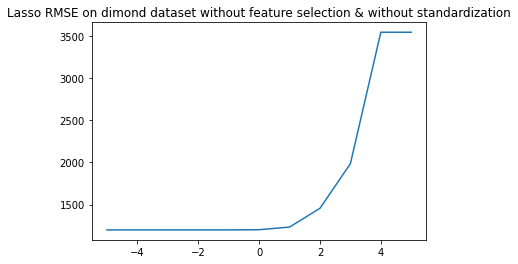

In [ ]:
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Lasso RMSE on dimond dataset without feature selection & without standardization")

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Ridge', alpha_list=alpha_list, feature=diamond_std_df[['carat','cut', 'color',	'clarity','x', 'y', 'z']], target=diamond_std_df['price'])

For Ridge Regression, the smallest rmse is 0.3026 obtained by alpha 1e-05


Text(0.5, 1.0, 'Ridge RMSE on dimond dataset with feature selection & with standardization')

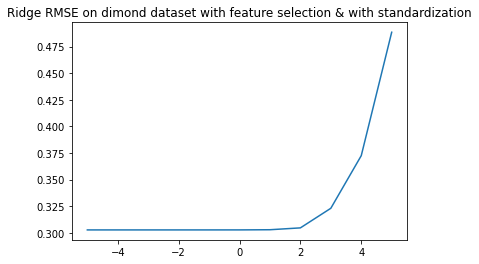

In [ ]:
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Ridge RMSE on dimond dataset with feature selection & with standardization")

For Ridge Regression, the smallest rmse is 1207.3223 obtained by alpha 1e-05


Text(0.5, 1.0, 'Ridge RMSE on dimond dataset with feature selection & without standardization')

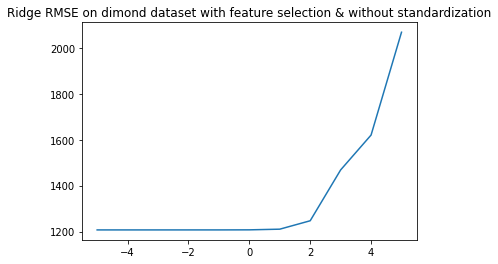

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Ridge', alpha_list=alpha_list, feature=diamond_df[['carat','cut', 'color',	'clarity','x', 'y', 'z']], target=diamond_df['price'])
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Ridge RMSE on dimond dataset with feature selection & without standardization")

For Ridge Regression, the smallest rmse is 0.3005 obtained by alpha 1e-05


Text(0.5, 1.0, 'Ridge RMSE on dimond dataset without feature selection & with standardization')

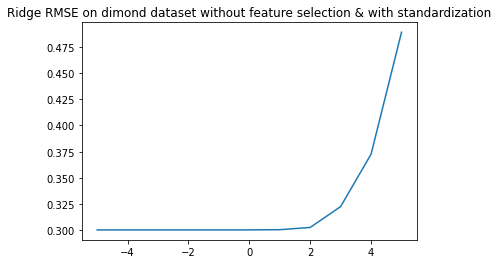

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Ridge', alpha_list=alpha_list, feature=diamond_std_df.drop(columns=['price'], inplace=False), target=diamond_std_df['price'])
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Ridge RMSE on dimond dataset without feature selection & with standardization")

For Ridge Regression, the smallest rmse is 1198.9523 obtained by alpha 1e-05


Text(0.5, 1.0, 'Ridge RMSE on dimond dataset without feature selection & without standardization')

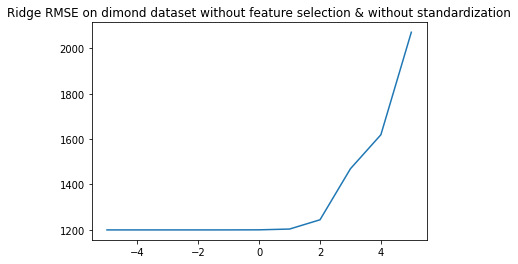

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Ridge', alpha_list=alpha_list, feature=diamond_df.drop(columns=['price'], inplace=False), target=diamond_df['price'])
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Ridge RMSE on dimond dataset without feature selection & without standardization")

For gas dataset

In [ ]:
linear_regression = LinearRegression(n_jobs=-1)
print("RMSE on dimond dataset with feature selection & with standardization")
print(cross_validation(linear_regression, gt_std_df[[ 'AT', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'Year']], gt_std_df['CO']))
print("RMSE on dimond dataset without feature selection & with standardization")
print(cross_validation(linear_regression, gt_std_df.drop(columns=['CO'], inplace=False), gt_std_df['CO']))
print("RMSE on dimond dataset with feature selection & without standardization")
print(cross_validation(linear_regression, gt_df[[ 'AT', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'Year']], gt_df['CO']))
print("RMSE on dimond dataset without feature selection & without standardization")
print(cross_validation(linear_regression, gt_df.drop(columns=['CO'], inplace=False), gt_df['CO']))

RMSE on dimond dataset with feature selection & with standardization
(0.6384579791701178, 0.6701609907898923)
RMSE on dimond dataset without feature selection & with standardization
(0.637818867555995, 0.6768361652492954)
RMSE on dimond dataset with feature selection & without standardization
(1.4446010979971424, 1.516333626824299)
RMSE on dimond dataset without feature selection & without standardization
(1.443155017958008, 1.5314371491671634)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.653e+02, tolerance: 3.489e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.463e+03, tolerance: 3.264e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

For Lasso Regression, the smallest rmse is 0.6655 obtained by alpha 0.01


Text(0.5, 1.0, 'Lasso RMSE on dimond dataset with feature selection & with standardization')

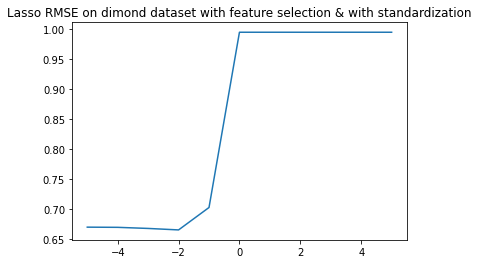

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Lasso', alpha_list=alpha_list, feature=gt_std_df[[ 'AT', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'Year']], target=gt_std_df['CO'])
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Lasso RMSE on dimond dataset with feature selection & with standardization")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.617e+04, tolerance: 1.786e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.295e+04, tolerance: 1.671e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

For Lasso Regression, the smallest rmse is 1.4912 obtained by alpha 0.1


Text(0.5, 1.0, 'Lasso RMSE on dimond dataset with feature selection & without standardization')

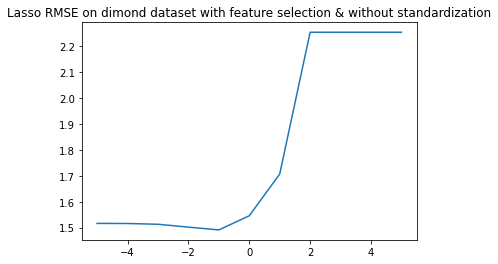

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Lasso', alpha_list=alpha_list, feature=gt_df[[ 'AT', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'Year']], target=gt_df['CO'])
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Lasso RMSE on dimond dataset with feature selection & without standardization")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.470e+03, tolerance: 3.489e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.042e+03, tolerance: 3.264e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

For Lasso Regression, the smallest rmse is 0.6667 obtained by alpha 0.01


Text(0.5, 1.0, 'Lasso RMSE on dimond dataset without feature selection & with standardization')

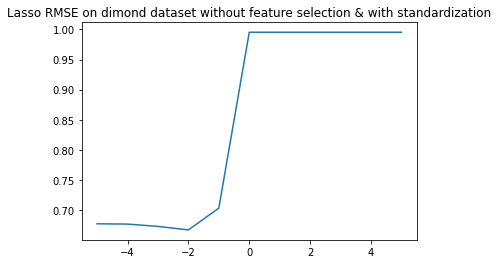

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Lasso', alpha_list=alpha_list, feature=gt_std_df.drop(columns=['CO'], inplace=False), target=gt_std_df['CO'])
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Lasso RMSE on dimond dataset without feature selection & with standardization")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.625e+04, tolerance: 1.786e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.307e+04, tolerance: 1.671e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

For Lasso Regression, the smallest rmse is 1.4950 obtained by alpha 0.1


Text(0.5, 1.0, 'Lasso RMSE on dimond dataset without feature selection & without standardization')

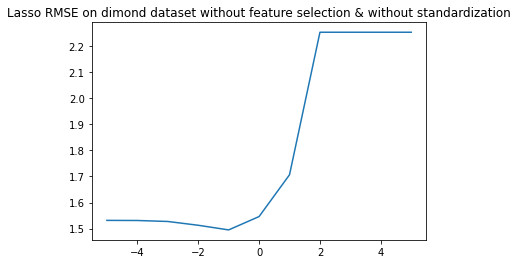

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Lasso', alpha_list=alpha_list, feature=gt_df.drop(columns=['CO'], inplace=False), target=gt_df['CO'])
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Lasso RMSE on dimond dataset without feature selection & without standardization")

For Ridge Regression, the smallest rmse is 0.6660 obtained by alpha 1000


Text(0.5, 1.0, 'Ridge RMSE on dimond dataset with feature selection & with standardization')

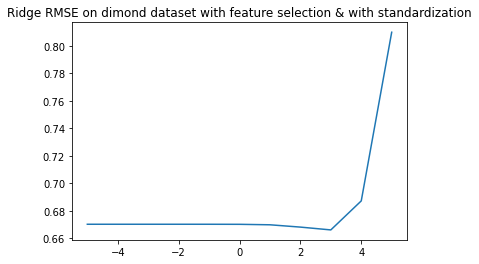

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Ridge', alpha_list=alpha_list, feature=gt_std_df[[ 'AT', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'Year']], target=gt_std_df['CO'])
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Ridge RMSE on dimond dataset with feature selection & with standardization")

For Ridge Regression, the smallest rmse is 1.4914 obtained by alpha 10000


Text(0.5, 1.0, 'Ridge RMSE on dimond dataset with feature selection & without standardization')

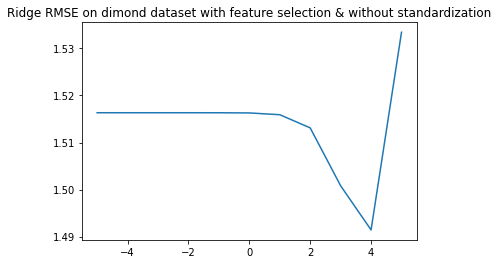

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Ridge', alpha_list=alpha_list, feature=gt_df[[ 'AT', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'Year']], target=gt_df['CO'])
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Ridge RMSE on dimond dataset with feature selection & without standardization")

For Ridge Regression, the smallest rmse is 0.6684 obtained by alpha 1000


Text(0.5, 1.0, 'Ridge RMSE on dimond dataset without feature selection & with standardization')

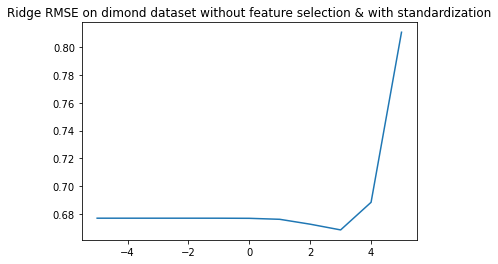

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Ridge', alpha_list=alpha_list, feature=gt_std_df.drop(columns=['CO'], inplace=False), target=gt_std_df['CO'])
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Ridge RMSE on dimond dataset without feature selection & with standardization")

For Ridge Regression, the smallest rmse is 1.4964 obtained by alpha 10000


Text(0.5, 1.0, 'Ridge RMSE on dimond dataset without feature selection & without standardization')

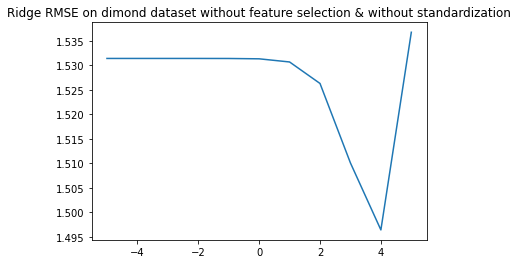

In [ ]:
train_rmse_list, test_rmse_list = test_reg_scheme(model='Ridge', alpha_list=alpha_list, feature=gt_df.drop(columns=['CO'], inplace=False), target=gt_df['CO'])
plt.plot(range(-5, 6), test_rmse_list)
plt.title("Ridge RMSE on dimond dataset without feature selection & without standardization")

**For dimond dataset:** Lasso regression with standardization and without feature selection has the lowest RMSE around 0.3005 with alpha equal to 1e-05


  **For gas dataset:**
  Lasso regression with both standardization and feature selection has the lowest RMSE around 0.6655 with alpha equal to 0.01


### Question 10: Does feature scaling play any role (in the cases with and without regularization)?

Prevent overfitting. if we scale the features and apply regularization it will give better result than no scaling with regularization. The reason is these models get affected by outliers. Check our report from Q9 where we tested the test RMSE with regards to feature scaling.

### Question 11: What is the meaning of p-values and how can you infer the most significant features?

The p-value for each term tests the null hypothesis that the coefficient is equal to zero. A low p-value indicates we can reject the null-hypothesis, i.e., a low p value means that this feature is significant while a large p value indicates the feature is possibly irrelavent.

### Question 12: Look up for the most salient features and interpret them. 

In [ ]:
poly = PolynomialFeatures()
diamond_X = diamond_df.drop(columns=['price'], inplace=False)
diamond_X
diamond_Y = diamond_df['price']
diamond_poly = poly.fit_transform(diamond_X)
features = poly.get_feature_names_out(diamond_X.columns)

diamond_mi = mutual_info_regression(diamond_poly, diamond_Y)
res = []

for i in range(len(diamond_mi)):
  res.append((features[i], diamond_mi[i]))

res.sort(key=lambda x:x[1], reverse=True)

for f in res:
  print(f[0], f[1])

# features

carat^2 1.6535015724068716
carat 1.6519701298194334
carat y 1.5692365239928279
carat x 1.554247696842582
carat clarity 1.5171643316348602
carat table 1.5138790288892832
carat z 1.509609054155563
y^2 1.422339167982857
y z 1.4211512601557175
y 1.4210763851792159
x z 1.4189420015745062
x^2 1.4116939446814412
x 1.4113994472486873
carat depth 1.4025708900194607
x y 1.4004443914181222
carat color 1.3980275368220685
z 1.3620652890086546
z^2 1.3612573151052203
depth y 1.3177895963534816
depth x 1.3148212893128353
carat cut 1.290230839254015
clarity x 1.268882836900584
clarity y 1.2574625763923715
clarity z 1.2175684835695124
table z 1.1654808886165782
depth z 1.130699610499657
table x 1.1232833218833393
table y 1.11477375214863
cut z 1.0563930217744666
cut x 1.054624309113799
cut y 1.045920967793351
color y 1.0026804404784393
color x 0.9967365479173802
color z 0.9883330942418072
color clarity 0.441047142578574
clarity table 0.24030721282887235
cut clarity 0.23157515676785811
clarity^2 0.217707

In [ ]:
poly = PolynomialFeatures()
gt_X = gt_df.drop(columns=['CO'], inplace=False)
gt_X
gt_Y = gt_df['CO']
gt_poly = poly.fit_transform(gt_X)
features = poly.get_feature_names_out(gt_X.columns)

gt_mi = mutual_info_regression(gt_poly, gt_Y)
res = []

for i in range(len(gt_mi)):
  res.append((features[i], gt_mi[i]))

res.sort(key=lambda x:x[1], reverse=True)

for f in res:
  print(f[0], f[1])

TIT Year 0.5735379338563593
TIT 0.5379606850869525
TIT^2 0.5370962127899688
TAT TEY 0.5266645583750433
TIT TEY 0.5178979200178428
TAT CDP 0.49872140975022106
TEY CDP 0.4983608041769543
TEY Year 0.4981855123161516
TIT CDP 0.4981784138719254
TEY^2 0.4955790799822273
TEY 0.49532145880774614
GTEP TEY 0.4861350458695197
CDP^2 0.47423932778614475
CDP 0.47391578240642307
CDP Year 0.47038770505248717
GTEP TIT 0.467568331534558
AP TEY 0.46568096236796475
GTEP CDP 0.4622810011760228
GTEP TAT 0.45696661272439965
GTEP^2 0.44620106330315057
GTEP 0.4453658501638662
GTEP Year 0.44218257183649357
AP GTEP 0.44087182568309036
AP CDP 0.43321996594959167
AFDP TEY 0.39849402283271296
TIT TAT 0.3979415095685024
AP TIT 0.396784202825299
AFDP GTEP 0.3858959895660945
AFDP CDP 0.36635641093860016
AFDP TIT 0.30531480180380566
AP AFDP 0.28766453453979146
AFDP TAT 0.2857940848491811
AFDP Year 0.28154459215667593
AFDP^2 0.2787013784420713
AFDP 0.27867581536306485
TAT Year 0.20416421226731352
TAT^2 0.160593708535075




*   For the diamond dataset, the salient features are carat with different combinations of maybe x, y, z, clarity. This corresponds to our heatmap back in Q2 where carat has highest correlation with target price. The larger the carat, the more expensive the price.
*   For the gas dataset, the salient features are TIT with different combinations. This also corresponds to our heatmap in Q2 in which the greater the TIT is, the smaller the CO emission.




### Question 13: What degree of polynomial is best? What does a very high-order polynomial imply about the fit on the training data? How do you choose this parameter?

In [ ]:
degree = list(range(5, 10))
best_rmse, best_d = float('inf'), 0
for d in tqdm(degree):
    polyreg = make_pipeline(PolynomialFeatures(d), LinearRegression())
    train_rmse, test_rmse = cross_validation(polyreg, diamond_df.drop(columns=['price'], inplace=False), diamond_std_df['price'])
    if test_rmse < best_rmse:
        best_rmse = test_rmse
        best_d = d
print("For Polynomial Regression, the smallest rmse is {:.4f} obtained by degree {}".format(best_rmse, best_d))

 40%|████      | 2/5 [38:56<1:06:11, 1323.79s/it]

High-order polynomial implies that the model is probably overfitting. To choose the degree parameter, we need to focus on the test rmse to actually see the generalization power of the model. We iterate the degree parameter from 5 to 14 to choose the best one with lowest rmse.

### Question 14: Craft new feature and check if it boosts accuracy

In [ ]:
new_feature = [diamond_std_df['x'][i] * diamond_std_df['y'][i] * diamond_std_df['z'][i] for i in range(diamond_std_df.shape[0])]
new_feature = StandardScaler().fit_transform(np.array(new_feature).reshape(-1, 1))
diamond_std_df['new_feature'] = new_feature

In [ ]:
polyreg = make_pipeline(PolynomialFeatures(best_d), LinearRegression())
train_rmse, test_rmse = cross_validation(polyreg, diamond_std_df[['carat', 'new_feature']], diamond_std_df['price'])

### Question 15: Why does neural network do much better than linear regression?

Neural network is able to deal with non-linearities while linear regression depends on certain linear dependency between features and target. If there is indeed non-linearities in the dataset, then neural network is expected to be better than linear regression.

### Question 16: Adjust your network size and weight decay as regularization. Find a good hyper-parameter set systematically

In [ ]:
lr_list = [0.001, 0.01, 0.1]
first_layer = [128, 256, 512]
second_layer = [128, 256, 512]
third_layer = [128, 256, 512]
best_setting = None
best_rmse = float('inf')
for lr in tqdm(lr_list):
    for fl in first_layer:
        for sl in second_layer:
            for tl in third_layer:
                mlp = MLPRegressor(learning_rate_init=lr, hidden_layer_sizes=(fl, sl, tl), learning_rate="invscaling", max_iter=300)
                train_rmse, test_rmse = cross_validation(mlp, diamond_std_df.drop(columns=['price']), diamond_std_df['price'], n_splits=3)
                if test_rmse < best_rmse:
                    best_rmse = test_rmse
                    best_setting = (lr, fl, sl, tl)
print(best_setting)

  0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages

### Question 17: What activation function should be used for the output?

We can use relu activation function to keep the continuity and linearility of the output while adding non-linearility to the model to grant it more generalization power.

### Question 18: What is the risk of increasing the depth of the network too far?

It will overfit the data and thus reults in poor validation performance while slowing down the training process.

### Question 19. Fine-tune your model. Explain how these hyper-parameters affect the overall performance? Do some of them have regularization effect?

In [ ]:
feature_list = list(range(4, 9))
tree_list = list(range(10, 100, 10))
depth = list(range(1, 5))
best_setting = None
best_rmse = float('inf')
for f in feature_list:
    for num_tree in tree_list:
        for d in depth:
            rf = RandomForestRegressor(n_estimators=num_tree, max_depth=d, max_features=f)
            train_rmse, test_rmse = cross_validation(rf, diamond_std_df.drop(columns=['price']), diamond_std_df['price'], n_splits=3)
            if test_rmse < best_rmse:
                best_rmse = test_rmse
                best_setting = (f, num_tree, d)
print(best_setting)

(4, 10, 4)


1. Max features: increasing this parameter generally boost the model performance, but it also decreases the diversity of each tree which is what makes random forest powerful. Also, too many features will obviously slow down the training process.
2. Number of trees: this parameter also increases model performance and enables the predictions to be more stable and realiable. This merit also comes at the cost of training speed. 
3. Depth of trees: too deep a tree will eventually overfit the data and too shallow a tree will not have enough generalization power. Normally we need a sub tree that is just deep enough but not enough to overfit and slow down the training process.

### Question 20: Why does random forest perform well?


Random forest is a kind of ensemble algorithm which gathers multiple individually-powerless classifier/regressor into a mutual prediction. These sub trees are relatively uncorrelated as a result of randomly chosen features and structures. In this way it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy. Ensemble algorithms can be proven to improve performance of individual classifier/regressor by many literatures.